In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Data Preparation

In [13]:
# Loading data
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.14E+11
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [14]:
# Discard all cryptocurrencies that are not being traded - filter and remove
filtered_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
filtered_crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [15]:
# Drop the IsTrading column
new_crypto_df = filtered_crypto_df.drop(["IsTrading"], axis='columns')
new_crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [16]:
# Remove all rows that have at least one null value
new_crypto_df.dropna(inplace=True)
new_crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [17]:
# Filter for cryptocurrencies that have been mined
# new_crypto_df.dtypes
new_crypto_df['TotalCoinSupply'] = pd.to_numeric(new_crypto_df['TotalCoinSupply'])

new_crypto_df = new_crypto_df[new_crypto_df['TotalCoinsMined'] > 0]


new_crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.140000e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [18]:
# Delete the CoinName from the original dataframe
final_crypto_df = new_crypto_df.drop(["CoinName"], axis='columns')
final_crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.140000e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


In [21]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
# Use Pandas to create dummy variables
X = pd.get_dummies(final_crypto_df, columns=['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.140000e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710444, -0.1528531 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.0939656 , -0.14499112, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.5249554 ,  4.48749054, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09560943, -0.13216038, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694444, -0.15254276, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710163, -0.15283832, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

## Dimensionality Reduction

In [29]:
# Perform dimensionality reduction with PCA - for this project, preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-3.35033543e-01,  1.03222275e+00, -5.90717369e-01, ...,
         1.50951648e-15,  1.93511521e-15, -2.41396193e-15],
       [-3.18368317e-01,  1.03236463e+00, -5.91129436e-01, ...,
         1.46504827e-15,  1.64130515e-15, -2.43333026e-15],
       [ 2.30456635e+00,  1.65649849e+00, -6.83610728e-01, ...,
        -4.72087159e-14, -3.25085868e-14,  5.71441810e-14],
       ...,
       [ 3.24176021e-01, -2.31231809e+00,  4.21513378e-01, ...,
         1.43075351e-14,  1.03997810e-16, -1.59258914e-14],
       [-1.49417457e-01, -2.04935034e+00,  4.12964645e-01, ...,
        -5.04853578e-16,  4.48770679e-16,  2.38601649e-16],
       [-2.89897972e-01,  8.21207344e-01, -2.76326854e-01, ...,
        -4.82584872e-16,  5.94308069e-16, -3.47858738e-16]])

In [30]:
# Further reduce the dataset dimensions with t-SNE
# Run t-SNE on the principal components: the output of the PCA transformation
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features

array([[-19.402431 ,   2.4871945],
       [-23.255615 ,   8.436743 ],
       [-32.47355  ,   3.915723 ],
       ...,
       [  8.0380535, -25.091486 ],
       [ 17.32879  , -11.717245 ],
       [  7.420425 ,   6.130684 ]], dtype=float32)

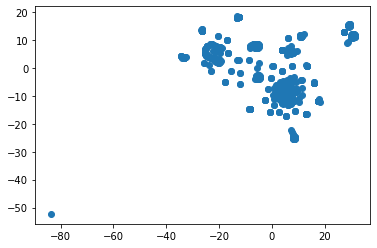

In [32]:
# Create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
final_crypto_df['x'] = tsne_features[:,0]
final_crypto_df['y'] = tsne_features[:,1]

plt.scatter(final_crypto_df['x'], final_crypto_df['y'])
plt.show()

## Cluster Analysis with k-means

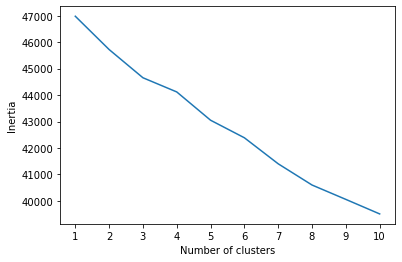

In [34]:
# Create an elbow plot to identify the best number of clusters
# Use a for-loop to determine the inertia for each k between 1 through 10
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

There does not appear to be much of an elbow with this data, which would lead to the conclusion that there aren't really any clusters. 

## Recommendation

These crypto currencies could be clustered, but several of the outliers would need to be eliminated. There appear to only be one or two general clusters, so those would be the focus. 